<a href="https://colab.research.google.com/github/Xspencer6/CPE-313---Activities/blob/main/Hands_on_Activity_2_2_Training_Neural_Networks_ALMODiEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [117]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [118]:

filepath = "/content/drive/MyDrive/data/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [119]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
495,6,166,74,0,0,26.6,0.304,66,0
202,0,108,68,20,0,27.3,0.787,32,0
669,9,154,78,30,100,30.9,0.164,45,0
521,3,124,80,33,130,33.2,0.305,26,0
89,1,107,68,19,0,26.5,0.165,24,0


In [120]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [150]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [123]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [153]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [125]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [126]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 12)                108       
                                                                 
 dense_31 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [127]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.6817 - accuracy: 0.6042 - val_loss: 0.6718 - val_accuracy: 0.6562
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6372 - val_loss: 0.6547 - val_accuracy: 0.6510
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6545 - val_loss: 0.6406 - val_accuracy: 0.6667
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6806 - val_loss: 0.6289 - val_accuracy: 0.6667
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.7014 - val_loss: 0.6190 - val_accuracy: 0.6823
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.7031 - val_loss: 0.6106 - val_accuracy: 0.6875
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.7170 - val_loss: 0.6034 - val_accuracy: 0.7031
Epoch 8/200


In [128]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [129]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [130]:
y_pred_prob_nn_1[:10]

array([[0.58051276],
       [0.5974004 ],
       [0.29516488],
       [0.18257546],
       [0.25017953],
       [0.42416787],
       [0.02065038],
       [0.2635917 ],
       [0.9502044 ],
       [0.14437601]], dtype=float32)

Create the plot_roc function

In [131]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.781
roc-auc is 0.815


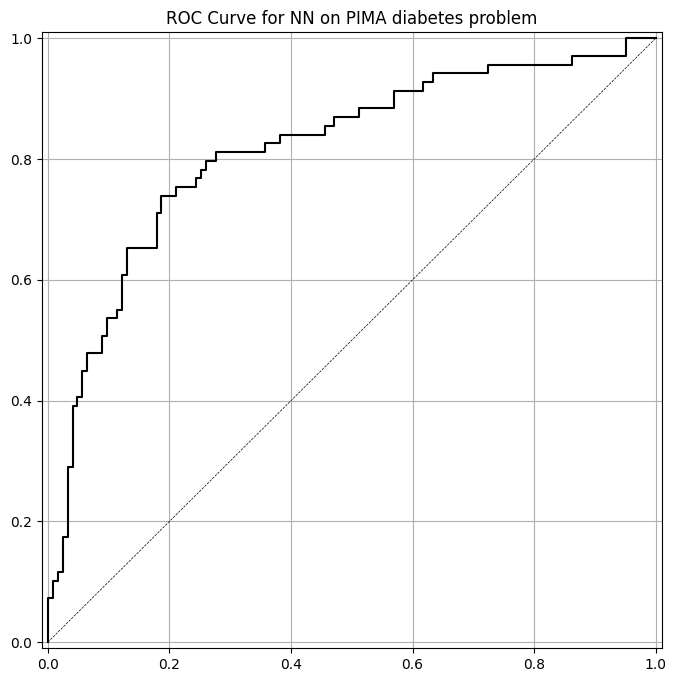

In [132]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [133]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

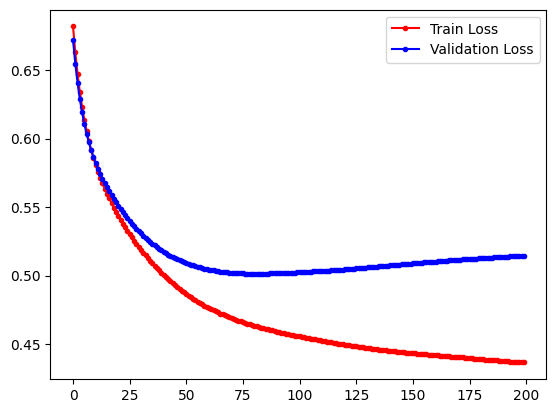

In [134]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- Validation loss is around 50-55% in 200 epochs . As the number of epochs increases, the model's ability to adapt to unseen data decreases. But further increasing the number of epochs may increase its performance in unseen data. The error loss increases, which means applying regularization on data may help as the model is not able to generalize on new data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

### Import data

In [135]:
smokerdf = pd.read_csv('/content/drive/MyDrive/data/smoking.csv')

In [136]:
smokerdf.shape

(55692, 27)

In [137]:
smokerdf.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [138]:
smokerdf.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


- Some maximum values within the data when compared to its corresponding mean are too large, which means StandardScaler should be used to normalize the behavior of data.

In [165]:
# Get dependent and independent variables
X = smokerdf.iloc[:, 1:-1]
X

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N


In [166]:
y = smokerdf.iloc[:, -1]
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

- Since there are columns that are not numerical, let's change it using np.where the value will be 1 if the corresponding value is equal to 'Y'. Otherwise it is 0.

In [167]:
X.oral = pd.Series(np.where(smokerdf.oral.values == 'Y', 1, 0), smokerdf.index)
X.tartar = pd.Series(np.where(smokerdf.tartar.values == 'Y', 1, 0), smokerdf.index)
X.gender = pd.Series(np.where(smokerdf.gender.values == 'M', 1, 0), smokerdf.index)
X

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,1
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,1,0,1
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,1,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,1,0,0


- We can now split the data to training and testing

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
36967,0,50,155,60,70.0,0.8,0.8,1.0,1.0,100.0,...,123.0,14.8,1.0,0.8,26.0,18.0,20.0,1,0,0
45466,0,40,155,50,73.0,1.2,1.0,1.0,1.0,122.0,...,97.0,12.3,1.0,0.7,18.0,13.0,12.0,1,0,1
47799,1,40,165,55,76.0,1.5,1.5,1.0,1.0,110.0,...,124.0,14.7,1.0,1.1,15.0,10.0,13.0,1,0,1
33247,0,45,160,50,74.0,1.0,1.2,1.0,1.0,139.0,...,200.0,13.1,1.0,0.6,16.0,8.0,11.0,1,1,0
19718,0,50,165,60,72.0,1.5,1.5,1.0,2.0,113.0,...,133.0,13.2,1.0,0.7,26.0,18.0,20.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,1,25,170,80,82.0,1.0,1.2,1.0,1.0,106.0,...,108.0,16.6,1.0,0.8,32.0,52.0,28.0,1,0,1
54343,1,45,165,55,70.0,0.7,1.0,1.0,1.0,135.0,...,102.0,13.0,1.0,0.8,25.0,16.0,21.0,1,0,1
38158,1,35,180,75,86.7,1.2,1.5,1.0,1.0,125.0,...,101.0,16.5,2.0,0.8,13.0,25.0,30.0,1,1,1
860,0,55,155,60,86.0,0.8,0.8,1.0,1.0,100.0,...,158.0,13.4,1.0,0.8,25.0,19.0,17.0,1,0,1


#### Normalize data using Standard Scaler

In [169]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

### Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [170]:
## Build a model with two hidden layers, each with 6 nodes
supple_model  = Sequential([
    Dense(16, input_dim=25, activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [171]:
supple_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 16)                416       
                                                                 
 dense_45 (Dense)            (None, 12)                204       
                                                                 
 dense_46 (Dense)            (None, 1)                 13        
                                                                 
Total params: 633 (2.47 KB)
Trainable params: 633 (2.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- I've created 2 hidden layers with the final layer using sigmoid activation

In [172]:
X_train_norm.shape

(38984, 25)

In [173]:
y_train.shape

(38984,)

In [174]:
y_test.shape

(16708,)

### Use a learning rate of .003 and train for 1500 epochs

In [ ]:
supple_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
supple_hist_1 = supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_train), epochs=1500)

Epoch 1/1500
1219/1219 [==============================] - 7s 4ms/step - loss: 0.4860 - accuracy: 0.7299 - val_loss: 0.4845 - val_accuracy: 0.7321
Epoch 2/1500
1219/1219 [==============================] - 4s 4ms/step - loss: 0.4835 - accuracy: 0.7332 - val_loss: 0.4822 - val_accuracy: 0.7342
Epoch 3/1500
1219/1219 [==============================] - 5s 4ms/step - loss: 0.4815 - accuracy: 0.7356 - val_loss: 0.4804 - val_accuracy: 0.7368
Epoch 4/1500
1219/1219 [==============================] - 5s 4ms/step - loss: 0.4799 - accuracy: 0.7374 - val_loss: 0.4789 - val_accuracy: 0.7388
Epoch 5/1500
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4785 - accuracy: 0.7391 - val_loss: 0.4776 - val_accuracy: 0.7401
Epoch 6/1500
1219/1219 [==============================] - 5s 4ms/step - loss: 0.4773 - accuracy: 0.7398 - val_loss: 0.4765 - val_accuracy: 0.7411
Epoch 7/1500
1219/1219 [==============================] - 5s 4ms/step - loss: 0.4762 - accuracy: 0.7412 - val_loss: 0.4755 -

### Graph the trajectory of the loss functions, accuracy on both train and test set

In [ ]:
y_pred_class_nn_1 = (supple_model.predict(X_test_norm) > 0.5 ).astype('int32')
y_pred_prob_nn_1 = supple_model.predict(X_test_norm)

In [ ]:
supple_hist_1.history.keys()

In [ ]:
fig, ax = plt.subplots()
ax.plot(supple_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(supple_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

### Conclusion

-

https://colab.research.google.com/drive/1Z76I6DEJ2B1bX6-taErtGxD1173pH0TN?usp=sharing